### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

#Display The DataFrame
df = pd.read_csv("data/The E-commerce Dataset.csv")
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [18]:
# Number of Null Values In Each Column
print("Null Values in userId:",df['userId'].isna().sum())
print("Null Values in timestamp:",df['timestamp'].isna().sum())
print("Null Values in review:",df['review'].isna().sum())
print("Null Values in item:",df['item'].isna().sum())
print("Null Values in rating:",df['rating'].isna().sum())
print("Null Values in helpfulness:",df['helpfulness'].isna().sum())
print("Null Values in gender:",df['gender'].isna().sum())
print("Null Values in category:",df['category'].isna().sum())
print("Null Values in item_id:",df['item_id'].isna().sum())
print("Null Values in item_price:",df['item_price'].isna().sum())
print("Null Values in user_city:",df['user_city'].isna().sum())

Null Values in userId: 0
Null Values in timestamp: 0
Null Values in review: 0
Null Values in item: 0
Null Values in rating: 17
Null Values in helpfulness: 22
Null Values in gender: 27
Null Values in category: 0
Null Values in item_id: 0
Null Values in item_price: 0
Null Values in user_city: 0


In [19]:
# Length of Data
print("The length of the data is:", len(df.index))

The length of the data is: 20000


In [20]:
# Removal of Data
df_new = df.dropna(subset=["gender","rating","helpfulness"])
df_new.drop(df_new[df_new['review'] == "none"].index, inplace = True)

In [21]:
#Display The New DataFrame
df_new.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [22]:
# Number of Null Values In Each Column of the New Dataframe
print("Null Values in userId:",df_new['userId'].isna().sum())
print("Null Values in timestamp:",df_new['timestamp'].isna().sum())
print("Null Values in review:",df_new['review'].isna().sum())
print("Null Values in item:",df_new['item'].isna().sum())
print("Null Values in rating:",df_new['rating'].isna().sum())
print("Null Values in helpfulness:",df_new['helpfulness'].isna().sum())
print("Null Values in gender:",df_new['gender'].isna().sum())
print("Null Values in category:",df_new['category'].isna().sum())
print("Null Values in item_id:",df_new['item_id'].isna().sum())
print("Null Values in item_price:",df_new['item_price'].isna().sum())
print("Null Values in user_city:",df_new['user_city'].isna().sum())

Null Values in userId: 0
Null Values in timestamp: 0
Null Values in review: 0
Null Values in item: 0
Null Values in rating: 0
Null Values in helpfulness: 0
Null Values in gender: 0
Null Values in category: 0
Null Values in item_id: 0
Null Values in item_price: 0
Null Values in user_city: 0


In [23]:
# Length of New Data
print("The length of the data is:", len(df_new.index))

The length of the data is: 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [24]:
#Q2.1
print("Total Number of Unique Users:", len(df_new.userId.unique()))
print("Total Number of Unique Reviews:", len(df_new.review.unique()))
print("Total Number of Unique Items:", len(df_new.item.unique()))
print("Total Number of Unique Categories:", len(df_new.category.unique()))

Total Number of Unique Users: 8562
Total Number of Unique Reviews: 19459
Total Number of Unique Items: 89
Total Number of Unique Categories: 9


In [25]:
#Q2.2
print("Descriptive Statistics of the Rating Records:")
print(df_new.rating.describe())

Descriptive Statistics of the Rating Records:
count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [26]:
#Q2.3
print("Descriptive Statistics of the Number of Items Rated by Different Genders:")
print(df_new.groupby("gender").item.describe())

Descriptive Statistics of the Number of Items Rated by Different Genders:
        count unique                   top freq
gender                                         
F        9793     89  AOL (America Online)  457
M       10123     89  AOL (America Online)  482


In [27]:
#Q2.4
print("Descriptive Statistics of the Number of Ratings That Recieved By Each Item:")
print(df_new.groupby("item").rating.describe())

Descriptive Statistics of the Number of Ratings That Recieved By Each Item:
                       count      mean       std  min   25%  50%  75%  max
item                                                                      
AOL (America Online)   939.0  2.500532  1.368528  1.0  1.00  2.0  4.0  5.0
All Advantage          657.0  3.412481  1.541706  1.0  2.00  4.0  5.0  5.0
Alta Vista (by 1stUp)  157.0  3.541401  1.263341  1.0  3.00  4.0  4.0  5.0
Amazon.com             240.0  3.683333  1.571095  1.0  2.00  4.0  5.0  5.0
American Airlines      185.0  3.054054  1.417015  1.0  2.00  3.0  4.0  5.0
...                      ...       ...       ...  ...   ...  ...  ...  ...
Wendy's                210.0  3.971429  1.093322  1.0  3.25  4.0  5.0  5.0
What Lies Beneath      160.0  3.450000  1.201676  1.0  3.00  3.5  4.0  5.0
X-Men                  245.0  4.118367  0.853074  1.0  4.00  4.0  5.0  5.0
X.com                  173.0  4.023121  1.474409  1.0  3.00  5.0  5.0  5.0
eBay                   5

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

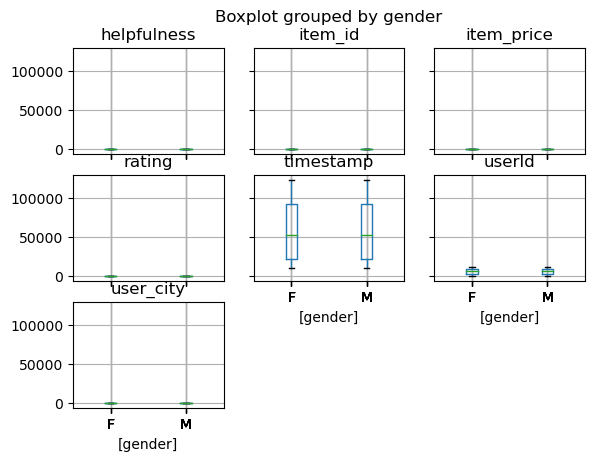

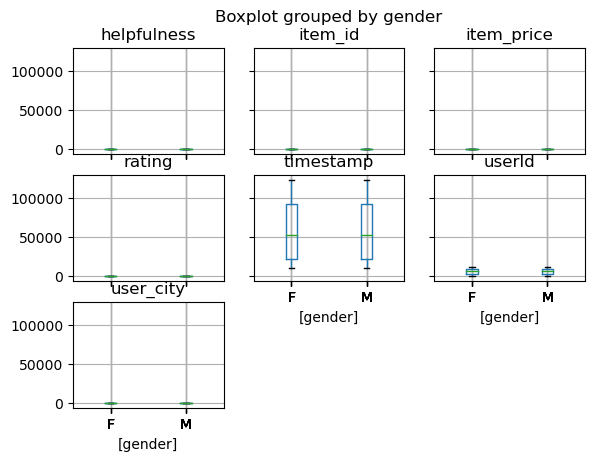

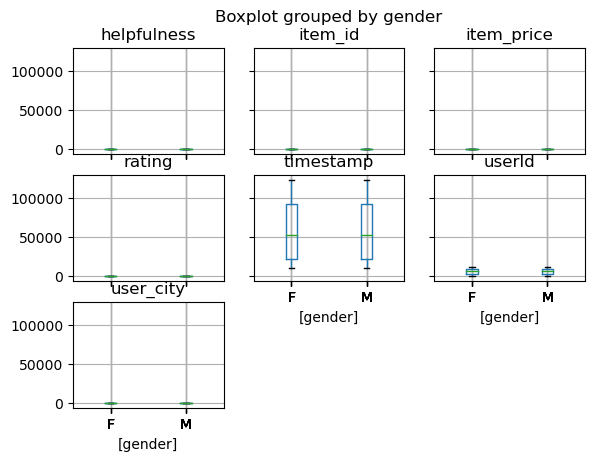

In [30]:
df_new.boxplot(by="gender")
plt.show()

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [29]:
# your code and solutions